# Question 2


In [2]:
#importing required libraries
from sympy import *
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline
init_printing(use_latex = True)
from matplotlib import rcParams
import pandas as pd
import pandas_datareader as pdr
import datetime
import numpy as np
plt.style.use('fivethirtyeight')
#Seting font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import math

In [3]:
#Question 1
#importing data with pandas 
filename = 'CA_data.txt'
df = pd.read_csv(filename,delim_whitespace = True,parse_dates = True,index_col = 'Quarter')

In [4]:

#checking that the import was done correctly

df.head()

,C,G,I
Quarter,,,
1981-01-01,109859750000,56521500000,43427750000
1981-04-01,109707500000,56411000000,44640750000
1981-07-01,109094500000,57100000000,43572500000
1981-10-01,109304250000,57255750000,43120750000
1982-01-01,107629750000,56774000000,41716750000


### Part a.

Text(0.5, 0, 'Government Spending')

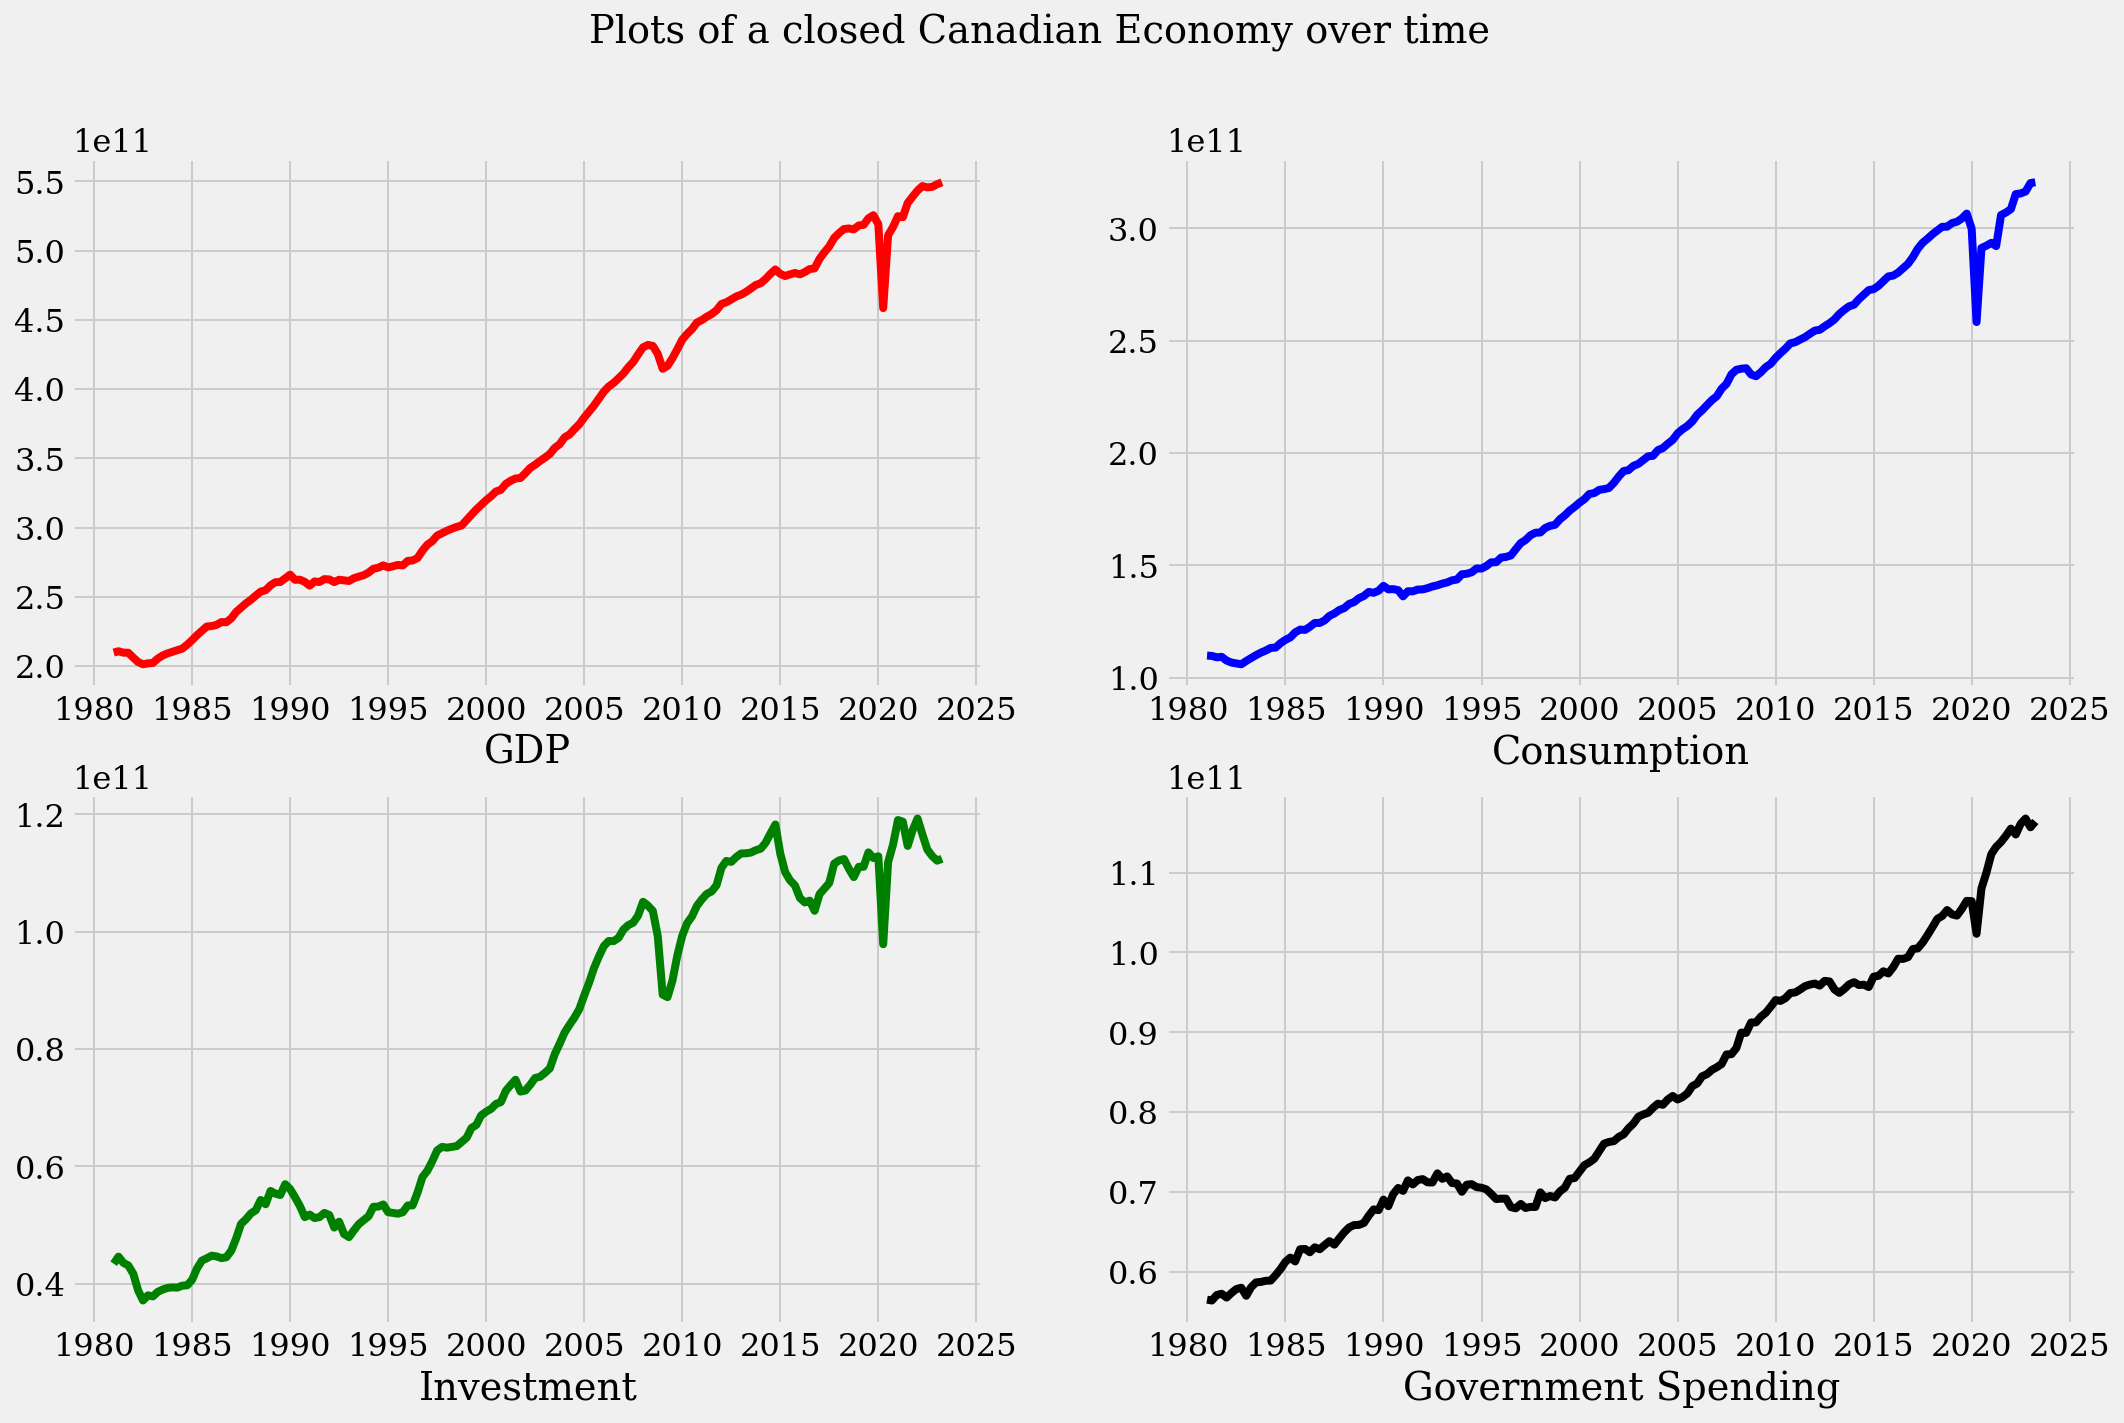

In [5]:
#Question 2 part a
x = df.index
C = df['C']
I = df['I']
G = df['G']
Y = C + I + G

fig,ax = plt.subplots(2,2,sharey = False,sharex = False, figsize = (16,10))
fig.suptitle("Plots of a closed Canadian Economy over time")
ax[0,0].plot(x,Y,color = 'red',linestyle = '-',linewidth = 4)
ax[0,1].plot(x,C,color = 'blue',linestyle = '-',linewidth = 4)
ax[1,0].plot(x,I,color = 'green',linestyle = '-',linewidth = 4)
ax[1,1].plot(x,G,color = 'black',linestyle = '-',linewidth = 4)
ax[0,0].set_xlabel('GDP')
ax[0,1].set_xlabel('Consumption')
ax[1,0].set_xlabel('Investment')
ax[1,1].set_xlabel('Government Spending')








### Part b.

Text(0, 0.5, 'y')

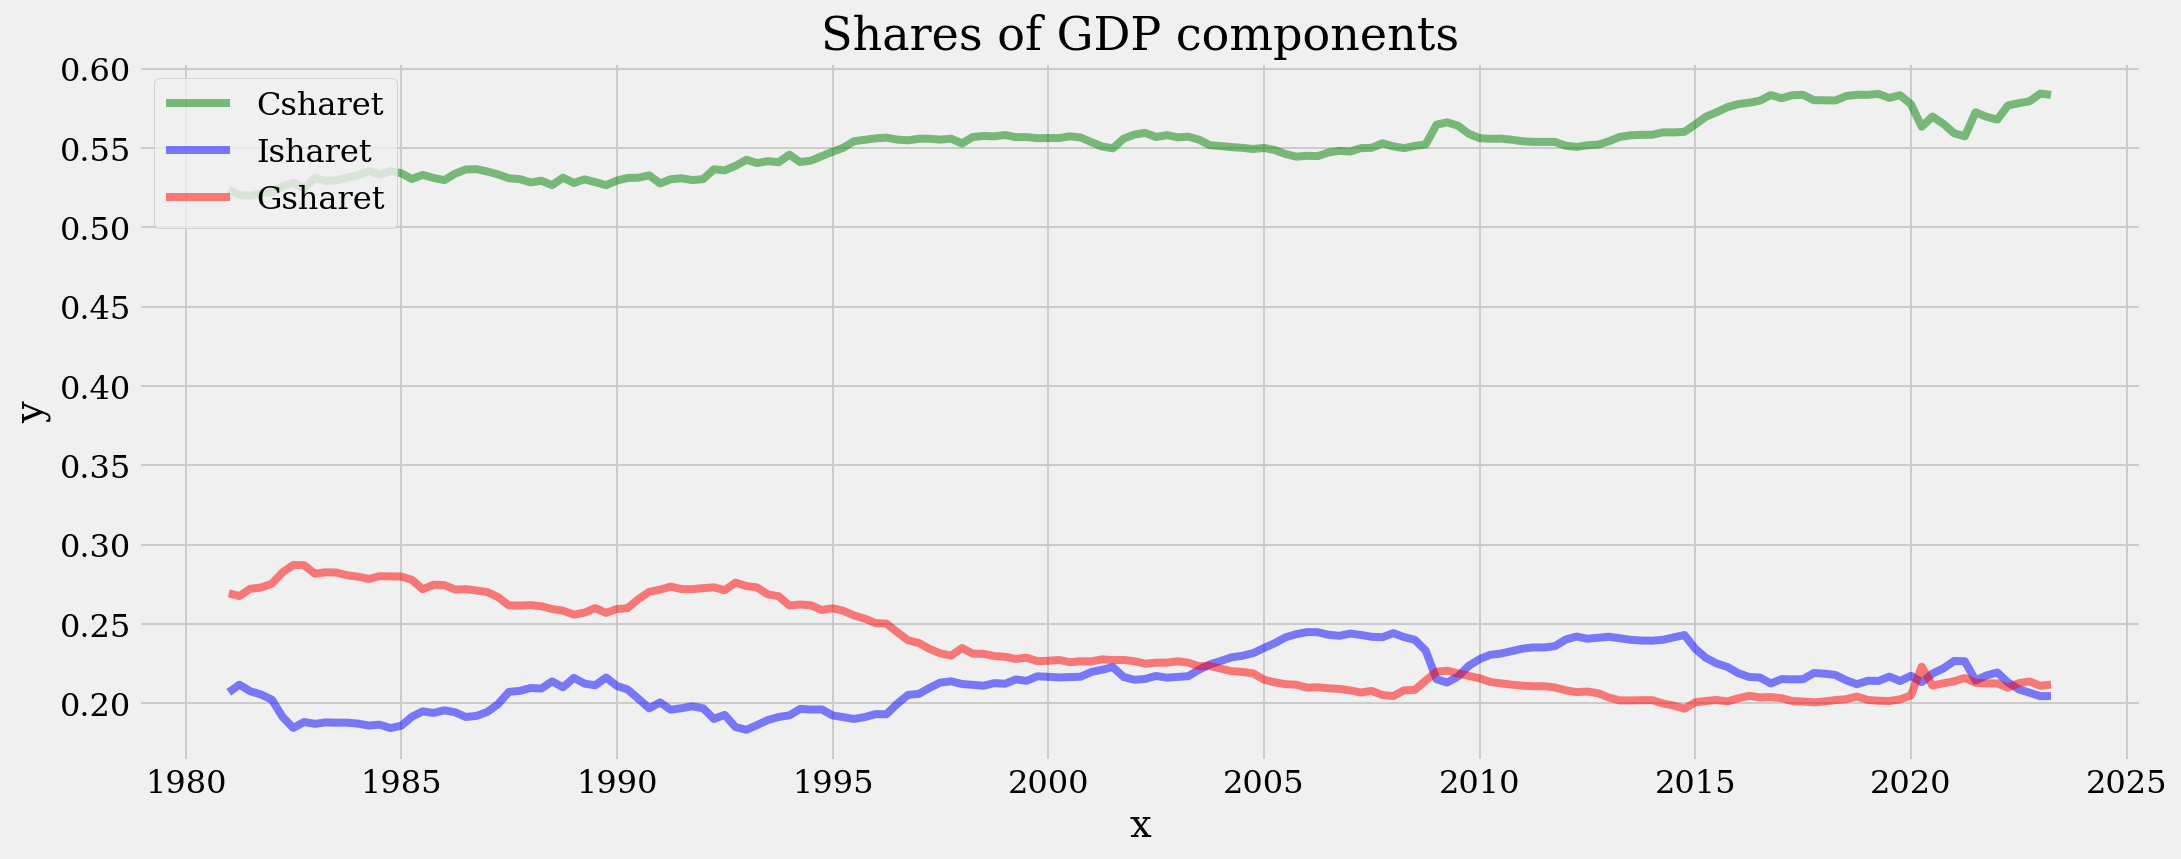

In [89]:
#Question 2 part b
x = df.index
Share_C = C/Y
Share_I = I/Y
Share_G = G/Y

fig = plt.figure(figsize=(16,6))
plt.plot(x, Share_C, color='g', linestyle='-',  linewidth=4, alpha=0.5,label = "Csharet")
plt.plot(x, Share_I, color='b', linestyle='-',  linewidth=4, alpha=0.5,label = "Isharet")
plt.plot(x, Share_G, color='r', linestyle='-',  linewidth=4, alpha=0.5,label = "Gsharet")
plt.legend(loc='upper left')
plt.title('Shares of GDP components')
plt.xlabel('x')
plt.ylabel('y')



## Part c

In [28]:
simple_gdp_growth_rate = Y.pct_change()
log_growth_rate = np.log(Y/Y.shift(1))
#log_growth_rate = [np.log(Y[i-2])- np.log(Y[i-1]) for i in range(Y.size)]


    


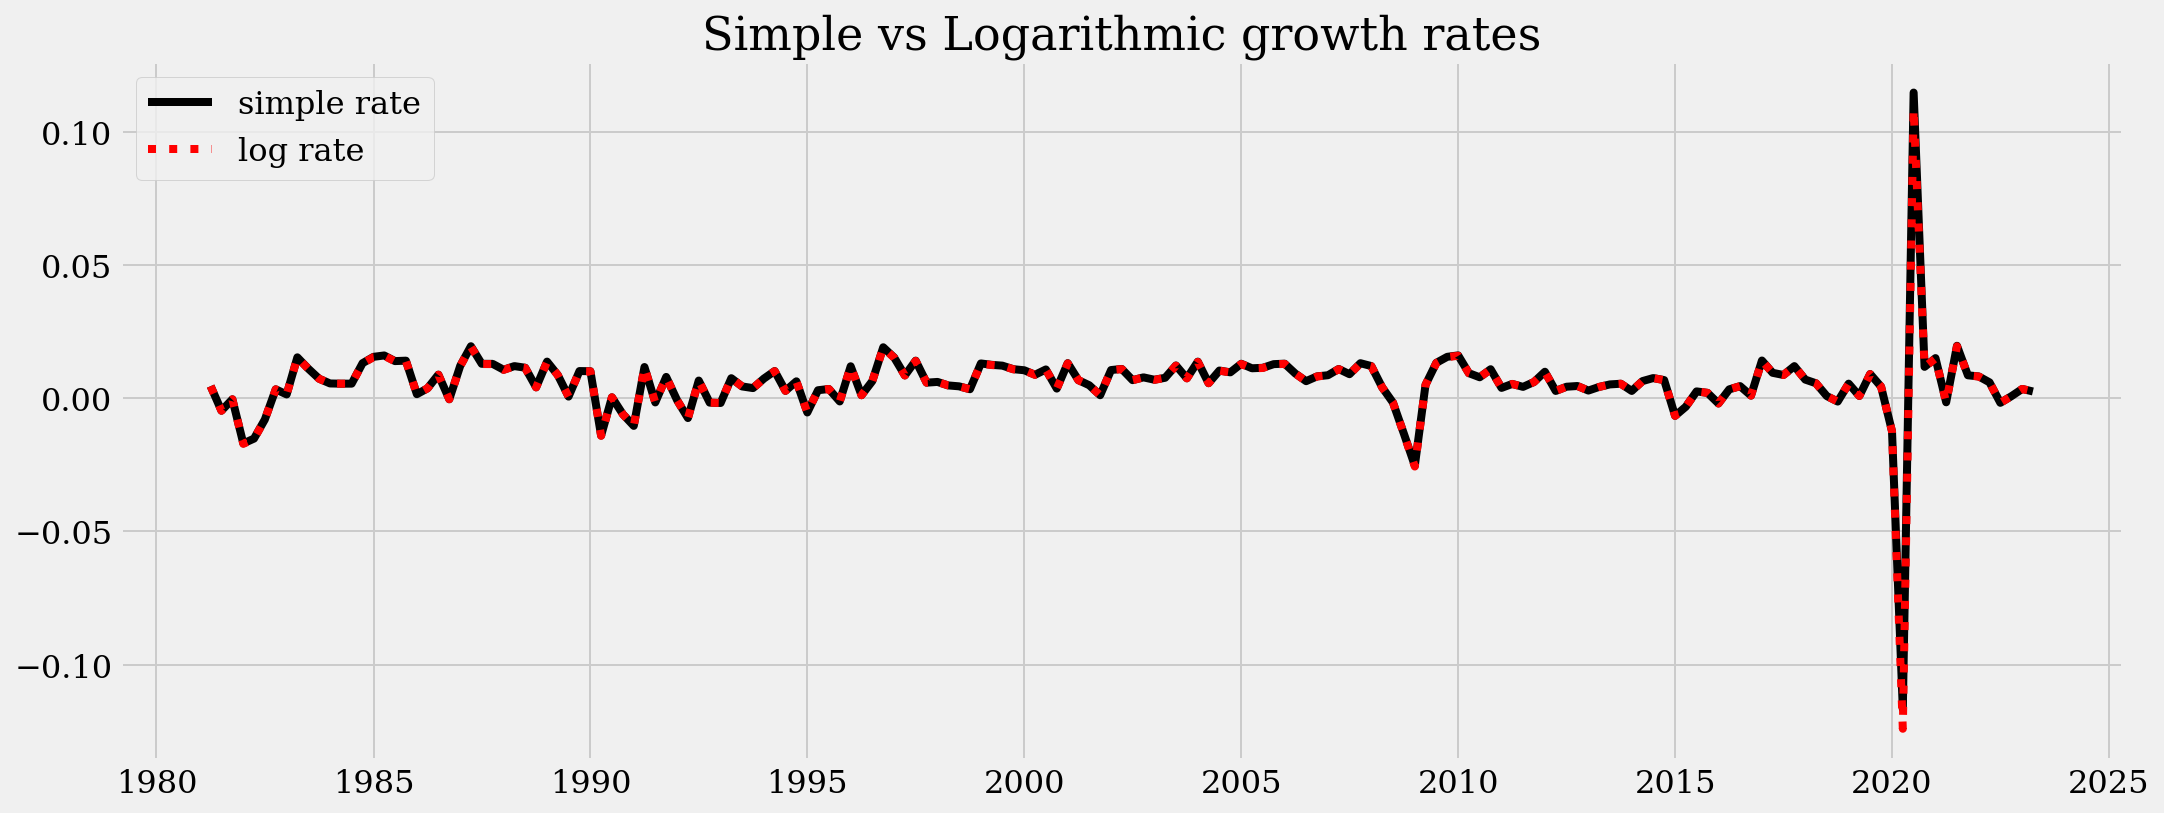

In [33]:
x = df.index 
fig = plt.figure(figsize=(16,6))
plt.plot(x,simple_gdp_growth_rate,color = 'black',linestyle = 'solid',linewidth = 4,label = 'simple rate')
plt.plot(x,log_growth_rate,color = 'red',linestyle = 'dotted',linewidth = 4,label = 'log rate')
plt.title("Simple vs Logarithmic growth rates")
plt.legend()


In [9]:
s = simple_gdp_growth_rate
l= log_growth_rate
percentage_deviation = ((s - l) / ((s + l) / 2)) * 100
percentage_deviation.head()

Quarter
1981-01-01         NaN
1981-04-01    0.226030
1981-07-01   -0.235862
1981-10-01   -0.020562
1982-01-01   -0.855032
dtype: float64

## Part d

Text(0.5, 0, 'Government Spending')

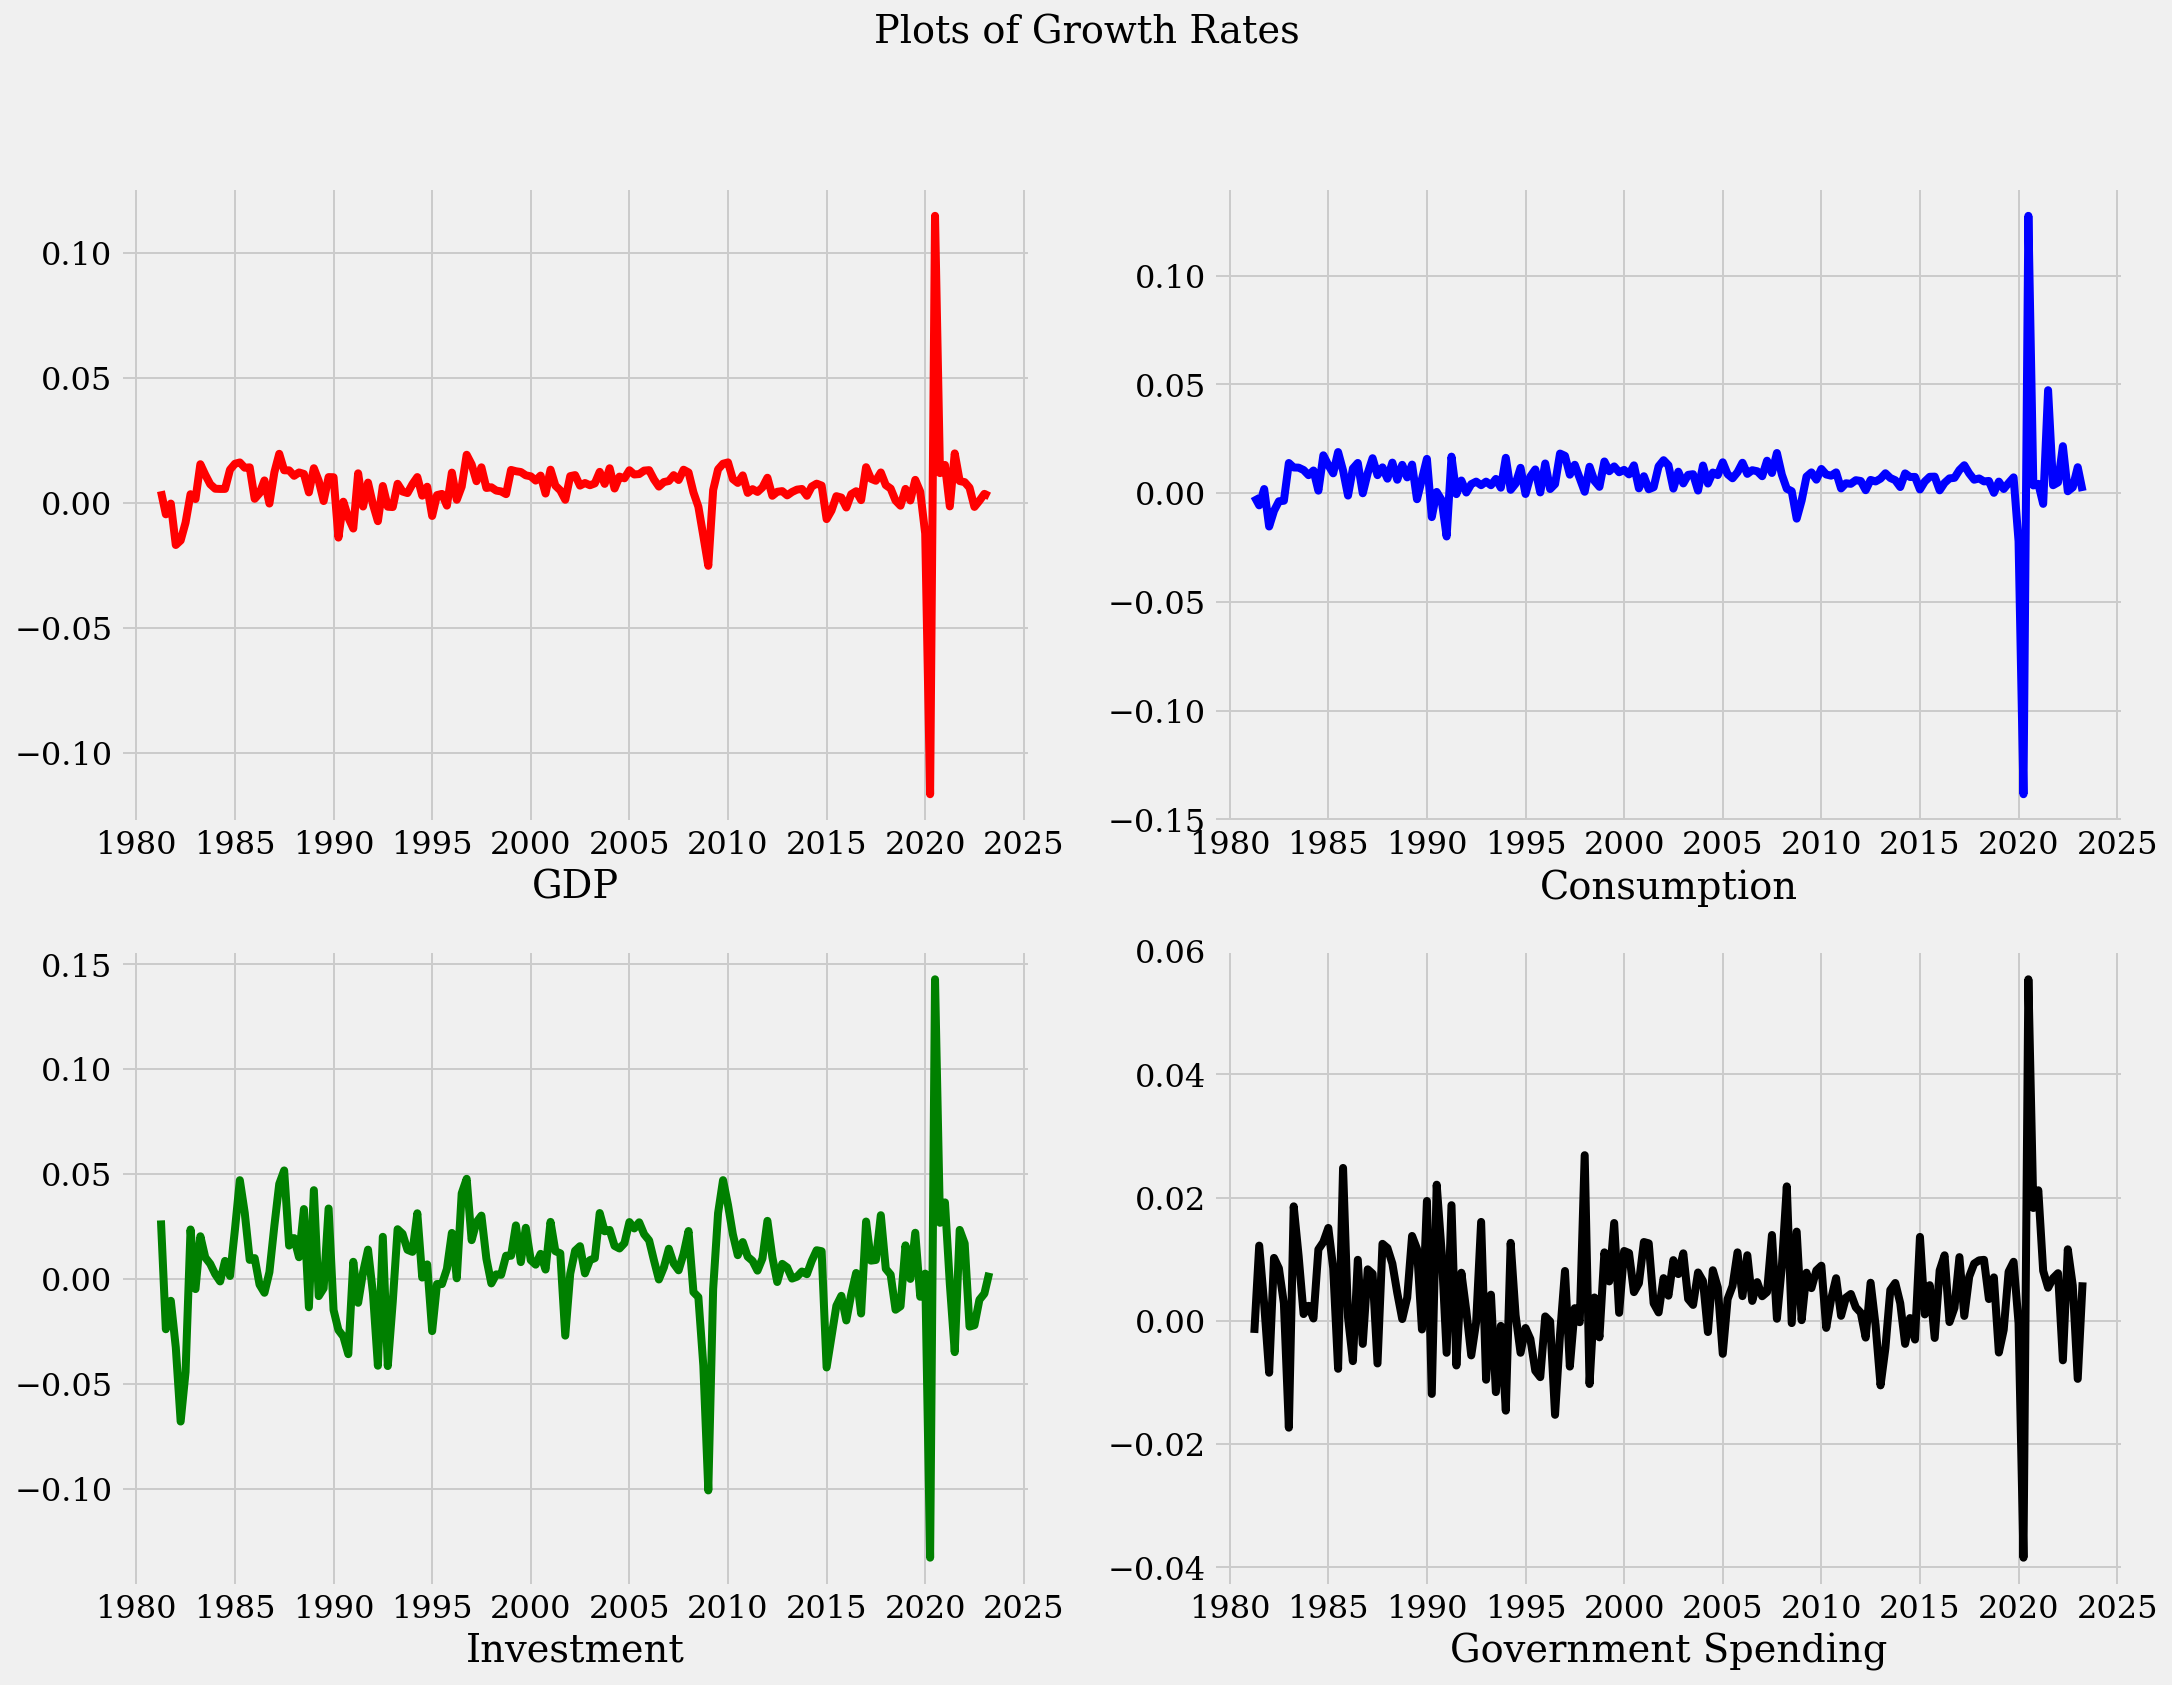

In [10]:
gdp_growth_rate = Y.pct_change()
consumption_growth_rate = C.pct_change()
investment_growth_rate = I.pct_change()
fiscal_spending_growth_rate = G.pct_change()
x = df.index

fig,ax = plt.subplots(2,2,sharey = False,sharex = False, figsize = (16,12))
fig.suptitle("Plots of Growth Rates")
ax[0,0].plot(x,gdp_growth_rate,color = 'red',linestyle = '-',linewidth = 4)
ax[0,1].plot(x,consumption_growth_rate,color = 'blue',linestyle = '-',linewidth = 4)
ax[1,0].plot(x,investment_growth_rate,color = 'green',linestyle = '-',linewidth = 4)
ax[1,1].plot(x,fiscal_spending_growth_rate,color = 'black',linestyle = '-',linewidth = 4)
ax[0,0].set_xlabel('GDP')
ax[0,1].set_xlabel('Consumption')
ax[1,0].set_xlabel('Investment')
ax[1,1].set_xlabel('Government Spending')



## Part e

In [11]:
growth_rates = pd.DataFrame({'GDP':gdp_growth_rate,'Consumption':consumption_growth_rate,
                           'Investment':investment_growth_rate,'Government Spending':fiscal_spending_growth_rate })
growth_rates.describe()

,GDP,Consumption,Investment,Government Spending
count,169.000000,169.000000,169.000000,169.000000
mean,0.005817,0.006491,0.005989,0.004328
std,0.014488,0.016309,0.026209,0.009413
min,-0.116689,-0.138411,-0.132777,-0.038433
25%,0.002754,0.002707,-0.002651,-0.000358
50%,0.006416,0.006864,0.008631,0.004368
75%,0.010967,0.010640,0.020386,0.009594
max,0.114709,0.127537,0.142823,0.055440


In [12]:
growth_rates.corr()

,GDP,Consumption,Investment,Government Spending
GDP,1.000000,0.942299,0.811308,0.576212
Consumption,0.942299,1.000000,0.605532,0.487783
Investment,0.811308,0.605532,1.000000,0.281520
Government Spending,0.576212,0.487783,0.281520,1.000000


# Question 1 


## Part b.

In [60]:
#alpha = 0.5, epsilon = -2.0
#demand function = 0.5p**-2
#deltap = -1*p**-3
p = 0.5
for i in range(100):
    
    
    f=.5 * p **-2 - 2 * p ** .5 
    d=-1 * p **-3 - p **-.5
    deltap = -f/d
        
    p = p + deltap
    print(p)
    

    if abs(deltap) < 1.e-8:
        break
print(f"Computed in {i} iterations")


    


0.5622236189720814
0.5740285524734964
0.5743489537536681
0.5743491774984085
0.5743491774985175
Computed in 4 iterations


### part c.

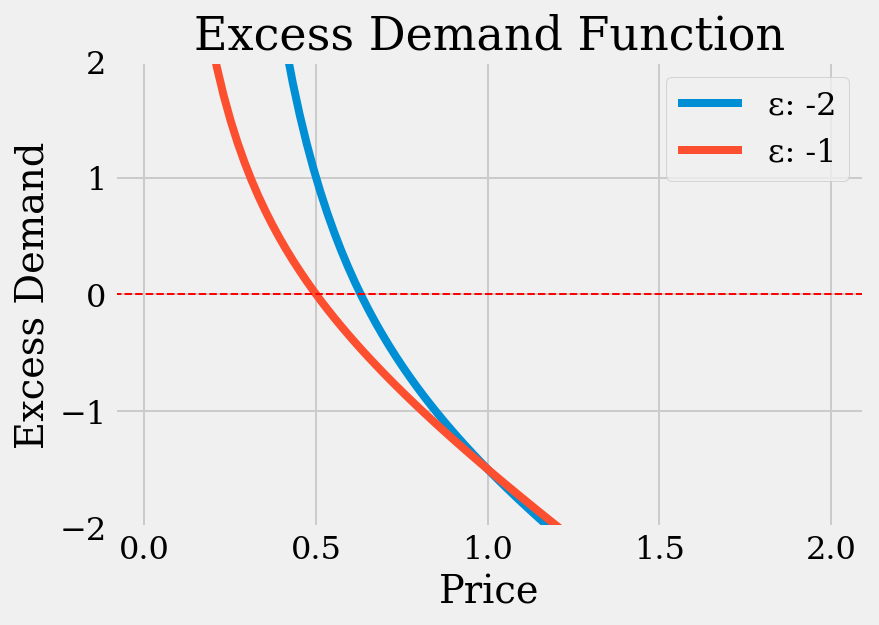

In [77]:
p = np.linspace(0.01,2,100)
elasticities = [-2,-1]

def Excess_Demand(p,elas):
    return 0.5*p**elas - 2*p
for elasticity in elasticities:
    plt.plot(p,Excess_Demand(p,elasticity),label = f"ε: {elasticity}")

plt.xlabel('Price')
plt.ylabel('Excess Demand')
plt.title('Excess Demand Function')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)

plt.legend()
plt.ylim(-2,2)

    
    
    
        




### part d.

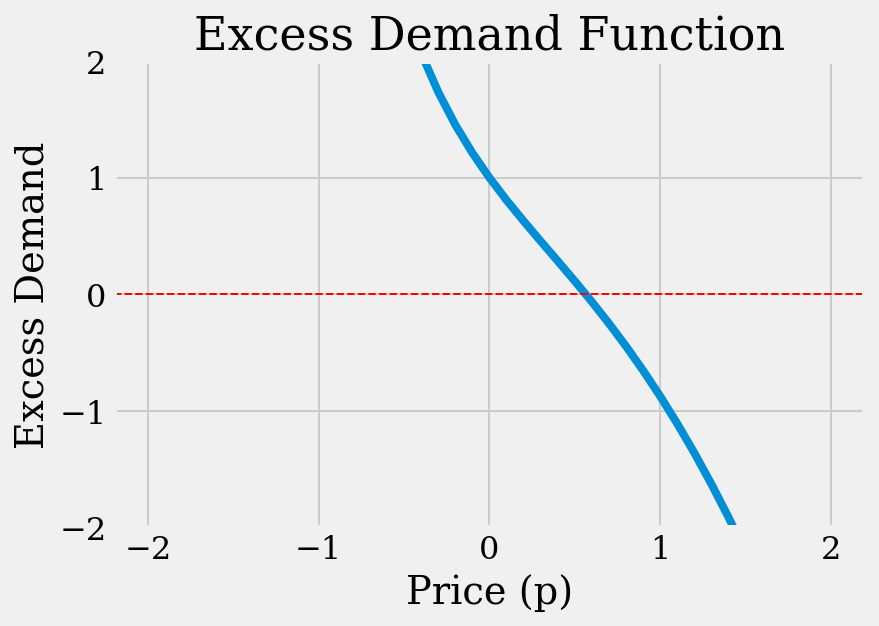

In [79]:
def excess_demand(p):
    return np.exp(-2*p) - 0.01*p- p**2

start = -2
step = 0.1
end = 2


p_values = np.arange(start,end+step,step)
excess_demand_list = excess_demand(p_values)
plt.plot(p_values, excess_demand_list, label='Excess Demand')
plt.xlabel('Price (p)')
plt.ylabel('Excess Demand')
plt.title('Excess Demand Function')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)

plt.ylim(-2,2)

plt.grid(True)
plt.show()



    



    

In [87]:
p = 0.0
for i in range(100):
    
    f=np.exp(-2*p) - 0.01*p- p**2
    d=-2*np.exp(-2*p) - 0.01 - p*2
    deltap = -f/d
        
    p = p + deltap
    print(p)
    

    if abs(deltap) < 1.e-8:
        break
print(f"Price = {p},computed in {i} iterations")


0.49751243781094534
0.564708557449029
0.5639687247565134
0.5639686164601598
0.5639686164601576
Price = 0.5639686164601576,computed in 4 iterations


### part e.

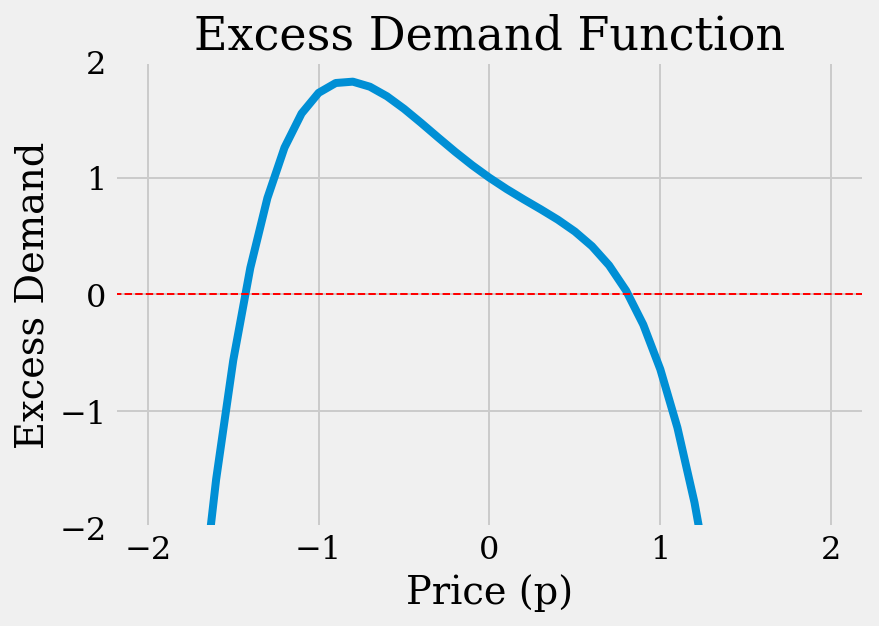

In [81]:
def excess_demand(p):
    return np.exp(-p) - 0.01*p- p**4

start = -2
step = 0.1
end = 2


p_values = np.arange(start,end+step,step)
excess_demand_list = excess_demand(p_values)
plt.plot(p_values, excess_demand_list, label='Excess Demand')
plt.xlabel('Price (p)')
plt.ylabel('Excess Demand')
plt.title('Excess Demand Function')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.ylim(-2,2)


plt.grid(True)
plt.show()

In [88]:
p = 0
for i in range(100):

    

    
    f=np.exp(-p) - 0.01*p- p**4
    d= (-np.exp(-p)) - 0.01- 4*p**3
    deltap = f/d
        
    p = p - deltap
    print(p)

    if abs(deltap) < 1.e-8:
        break
print(f"Price = {p},computed in {i} iterations")

0.9900990099009901
0.849537232663613
0.814329837165257
0.8124344026543568
0.8124292170425147
0.8124292170038313
Price = 0.8124292170038313,computed in 5 iterations


In [78]:
p = 0.3
for i in range(100):
    
    
    f=0.5*p**-2 - 2*p**1
    d=-1 * p **-3 - 2
    deltap = -f/d
        
    p = p + deltap
    print(p)
    

    if abs(deltap) < 1.e-8:
        break
print(f"Computed in {i} iterations")



0.42694497153700195
0.5541627107526501
0.6201635563767954
0.6298065982821767
0.6299604873303536
0.6299605249474344
0.6299605249474366
Computed in 6 iterations
